# C2W1: Using CNN's with the Cats vs Dogs Dataset

* https-deeplearning-ai/**tensorflow-1-public**/C2/W1/assignment/[C2W1_Assignment.ipynb](https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C2/W1/assignment/C2W1_Assignment.ipynb)
* Commit `d79901f` on Feb 23, 2023, [Compare](https://github.com/https-deeplearning-ai/tensorflow-1-public/compare/d79901f..)

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2023-04-12 14:12:51--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.124.158.9, 2600:1406:3a00:283::317f, 2600:1406:3a00:284::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.124.158.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M  5.91MB/s    in 2m 15s  

2023-04-12 14:15:06 (5.82 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]



In [3]:
source_path = '/tmp/PetImages'

source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# Deletes all non-image files (there are two .db files bundled into the dataset)
!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


In [4]:
root_dir = '/tmp/cats-v-dogs'

if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
    os.makedirs(os.path.join(root_path, 'training/cats'))
    os.makedirs(os.path.join(root_path, 'training/dogs'))
    os.makedirs(os.path.join(root_path, 'validation/cats'))
    os.makedirs(os.path.join(root_path, 'validation/dogs'))

try:
    create_train_val_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [5]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/cats-v-dogs/training
/tmp/cats-v-dogs/validation
/tmp/cats-v-dogs/training/dogs
/tmp/cats-v-dogs/training/cats
/tmp/cats-v-dogs/validation/dogs
/tmp/cats-v-dogs/validation/cats


In [6]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):

    source_files = []

    for image_name in os.listdir(SOURCE_DIR):
        image_path = os.path.join(SOURCE_DIR, image_name)
        
        if not os.path.getsize(image_path):
            print(f"{image_name} is zero length, so ignoring.")
            continue
        
        source_files.append(image_name)

    num_images = len(source_files)
    num_training = int(num_images * SPLIT_SIZE)
    list_files = random.sample(source_files, num_images)
    
    training_images = list_files[:num_training]
    validation_images = list_files[num_training:]

    for training_image in training_images:
        shutil.copyfile(os.path.join(SOURCE_DIR, training_image), 
                        os.path.join(TRAINING_DIR, training_image))

    for validation_image in validation_images:
        shutil.copyfile(os.path.join(SOURCE_DIR, validation_image), 
                        os.path.join(VALIDATION_DIR, validation_image))

In [7]:
CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"

TRAINING_DIR = "/tmp/cats-v-dogs/training/"
VALIDATION_DIR = "/tmp/cats-v-dogs/validation/"

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATS_DIR)) > 0:
  for file in os.scandir(TRAINING_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_DOGS_DIR)) > 0:
  for file in os.scandir(TRAINING_DOGS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_CATS_DIR)) > 0:
  for file in os.scandir(VALIDATION_CATS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_DOGS_DIR)) > 0:
  for file in os.scandir(VALIDATION_DOGS_DIR):
    os.remove(file.path)

split_size = .9

split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [8]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  train_datagen = ImageDataGenerator(rescale=1/255)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  validation_datagen = ImageDataGenerator(rescale=1/255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150, 150))

  return train_generator, validation_generator

In [9]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [10]:
def create_model():

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),

        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation='sigmoid')])

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy']) 

    return model

In [11]:
model = create_model()

history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
398/704 [===============>..............] - ETA: 15s - loss: 0.5971 - accuracy: 0.6675

/home/eavelar/miniconda3/envs/py38_tf210/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:864: UserWarning: Truncated File Read
  warnings.warn(str(msg))


704/704 [==============================] - 44s 58ms/step - loss: 0.5652 - accuracy: 0.6984 - val_loss: 0.5106 - val_accuracy: 0.7640
Epoch 2/15
704/704 [==============================] - 39s 55ms/step - loss: 0.4757 - accuracy: 0.7725 - val_loss: 0.4536 - val_accuracy: 0.7972
Epoch 3/15
704/704 [==============================] - 43s 62ms/step - loss: 0.4211 - accuracy: 0.8097 - val_loss: 0.4263 - val_accuracy: 0.8148
Epoch 4/15
704/704 [==============================] - 44s 63ms/step - loss: 0.3809 - accuracy: 0.8285 - val_loss: 0.3859 - val_accuracy: 0.8388
Epoch 5/15
704/704 [==============================] - 43s 62ms/step - loss: 0.3470 - accuracy: 0.8495 - val_loss: 0.3908 - val_accuracy: 0.8316
Epoch 6/15
704/704 [==============================] - 42s 60ms/step - loss: 0.3112 - accuracy: 0.8655 - val_loss: 0.4098 - val_accuracy: 0.8296
Epoch 7/15
704/704 [==============================] - 42s 60ms/step - loss: 0.2810 - accuracy: 0.8801 - val_loss: 0.4835 - val_accuracy: 0.8116
Epo

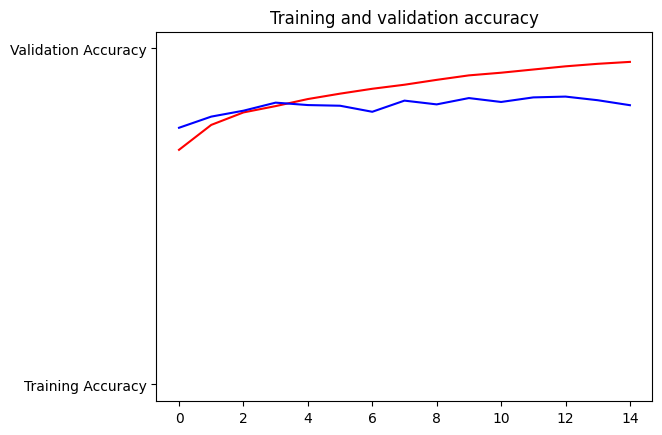

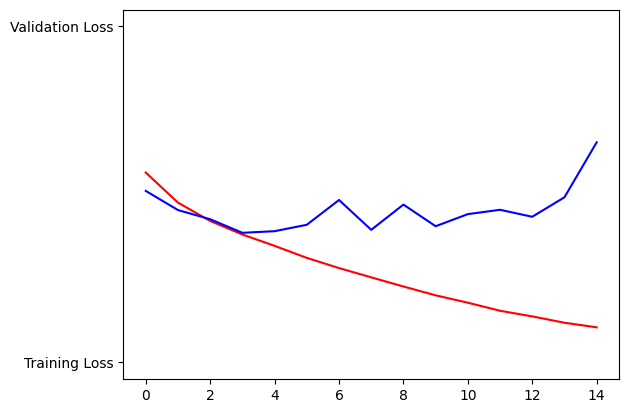

In [12]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()